<a href="https://colab.research.google.com/github/rushh001/Data_Mining_DA1/blob/main/Data_Mining_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.naive_bayes import GaussianNB

# New dataset with COVID-19 test results and symptoms
data = {
    'Cough': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No'],
    'Fever': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Diabetes': ['No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes'],
    'Blood Pressure': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Age': [35, 45, 50, 28, 55, 38, 42, 60, 30, 48, 25, 32, 40, 50, 35],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'COVID-19 Test': ['Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive']
}

# Convert categorical variables into numerical variables manually
cough_mapping = {'Yes': 1, 'No': 0}
fever_mapping = {'Yes': 1, 'No': 0}
diabetes_mapping = {'Yes': 1, 'No': 0}
blood_pressure_mapping = {'High': 1, 'Normal': 0}
gender_mapping = {'Male': 1, 'Female': 0}
covid_test_mapping = {'Positive': 1, 'Negative': 0}

data['Cough'] = [cough_mapping[val] for val in data['Cough']]
data['Fever'] = [fever_mapping[val] for val in data['Fever']]
data['Diabetes'] = [diabetes_mapping[val] for val in data['Diabetes']]
data['Blood Pressure'] = [blood_pressure_mapping[val] for val in data['Blood Pressure']]
data['Gender'] = [gender_mapping[val] for val in data['Gender']]
data['COVID-19 Test'] = [covid_test_mapping[val] for val in data['COVID-19 Test']]

# Define features (X) and target variable (y)
X = [data['Cough'], data['Fever'], data['Diabetes'], data['Blood Pressure'], data['Age'], data['Gender']]
X = list(zip(*X))  # Transpose the feature matrix
y = data['COVID-19 Test']

# Create and train the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# Define the input for prediction
input_data = [[1, 1, 0, 1, 40, 1],  # (Cough: Yes, Fever: Yes, Diabetes: No, Blood Pressure: High, Age: 40, Gender: Male)
              [0, 0, 1, 0, 28, 0],  # entry 1
              [1, 0, 0, 0, 55, 1],  # entry 2
              [0, 1, 1, 1, 42, 0],  # entry 3
              [1, 1, 0, 0, 30, 1],  # entry 4
              [0, 0, 0, 1, 48, 0],  # entry 5
              [1, 1, 0, 1, 25, 1],  # entry 6
              [0, 0, 1, 0, 32, 0],  # entry 7
              [1, 0, 0, 0, 40, 1],  # entry 8
              [0, 1, 1, 1, 50, 0]]  # entry 9

# Make predictions for the entries
predictions = clf.predict(input_data)
for i, prediction in enumerate(predictions):
    print(f"Predicted COVID-19 Test outcome for additional entry {i+1}: {'Positive' if prediction == 1 else 'Negative'}")


Predicted COVID-19 Test outcome for additional entry 1: Positive
Predicted COVID-19 Test outcome for additional entry 2: Negative
Predicted COVID-19 Test outcome for additional entry 3: Positive
Predicted COVID-19 Test outcome for additional entry 4: Negative
Predicted COVID-19 Test outcome for additional entry 5: Positive
Predicted COVID-19 Test outcome for additional entry 6: Negative
Predicted COVID-19 Test outcome for additional entry 7: Positive
Predicted COVID-19 Test outcome for additional entry 8: Negative
Predicted COVID-19 Test outcome for additional entry 9: Negative
Predicted COVID-19 Test outcome for additional entry 10: Positive


In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Example COVID-19 symptoms dataset
data = {
    'Patient_ID': [1, 2, 3, 4, 5],
    'Symptoms': [['fever', 'cough', 'fatigue'],
                 ['cough', 'sore throat'],
                 ['fever', 'loss of taste', 'loss of smell'],
                 ['fever', 'fatigue'],
                 ['cough', 'sore throat']]
}

df = pd.DataFrame(data)
df['Symptoms'] = df['Symptoms'].apply(lambda x: ','.join(x))

df_encoded = df['Symptoms'].str.get_dummies(sep=',')
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
    support                               itemsets
0       0.6                                (cough)
1       0.4                              (fatigue)
2       0.6                                (fever)
3       0.2                        (loss of smell)
4       0.2                        (loss of taste)
5       0.4                          (sore throat)
6       0.2                       (fatigue, cough)
7       0.2                         (fever, cough)
8       0.4                   (sore throat, cough)
9       0.4                       (fever, fatigue)
10      0.2                 (fever, loss of smell)
11      0.2                 (fever, loss of taste)
12      0.2         (loss of smell, loss of taste)
13      0.2                (fever, fatigue, cough)
14      0.2  (fever, loss of smell, loss of taste)

Association Rules:
                       antecedents                     consequents  \
0                    (sore throat)                         (cough)   
1    

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [3]:
from mlxtend.frequent_patterns import apriori
import pandas as pd

# COVID-19 symptoms dataset
data = {
    'Patient_ID': [1, 2, 3, 4, 5],
    'Symptoms': [['fever', 'cough', 'fatigue'],
                 ['cough', 'sore throat'],
                 ['fever', 'loss of taste', 'loss of smell'],
                 ['fever', 'fatigue'],
                 ['cough', 'sore throat']]
}

df = pd.DataFrame(data)

df['Symptoms'] = df['Symptoms'].apply(lambda x: ','.join(x))
df_encoded = df['Symptoms'].str.get_dummies(sep=',')

frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
    support                               itemsets
0       0.6                                (cough)
1       0.4                              (fatigue)
2       0.6                                (fever)
3       0.2                        (loss of smell)
4       0.2                        (loss of taste)
5       0.4                          (sore throat)
6       0.2                       (fatigue, cough)
7       0.2                         (fever, cough)
8       0.4                   (sore throat, cough)
9       0.4                       (fever, fatigue)
10      0.2                 (fever, loss of smell)
11      0.2                 (fever, loss of taste)
12      0.2         (loss of smell, loss of taste)
13      0.2                (fever, fatigue, cough)
14      0.2  (fever, loss of smell, loss of taste)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


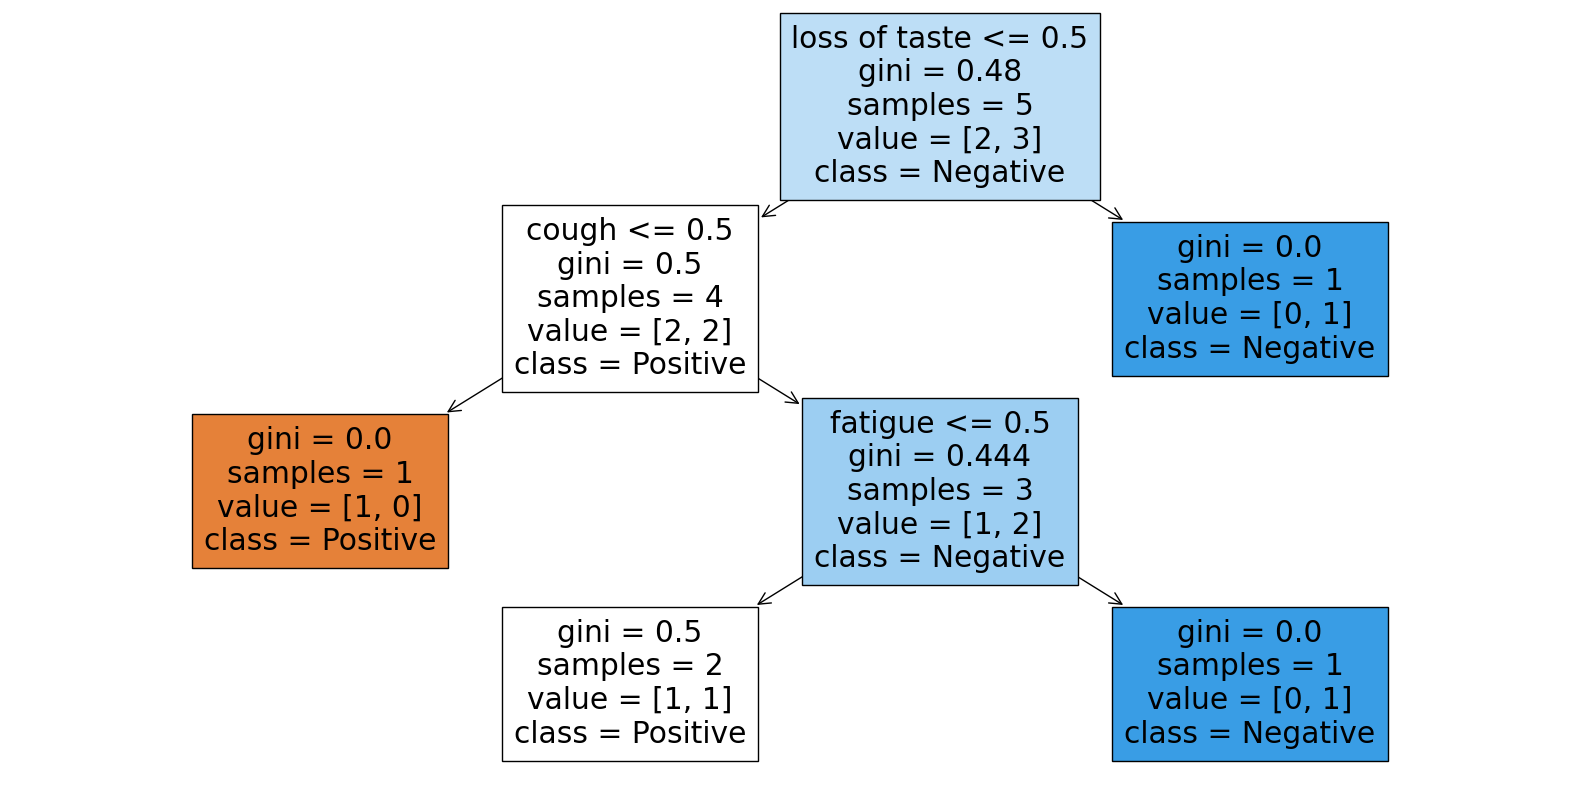

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Dummy target variable indicating COVID-19 status
df['COVID_Status'] = ['Positive', 'Negative', 'Positive', 'Negative', 'Positive']
df_encoded = pd.get_dummies(df['Symptoms'].str.get_dummies(sep=','))
X = df_encoded
y = df['COVID_Status']
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=df_encoded.columns, class_names=df['COVID_Status'].unique())
plt.show()
